# Final Project 3 - Kelompok 1
___
PYTN-KS17-01 <br>
Anggota: 
- Abigail Angginaomi 	
- Jaya Hari Santoso	
- Muhammad Zaisya Fitriannuur Rahman 	
- Rheina Febrianti Khairunissa 

# Latar Belakang

Penyakit kardiovaskular (CVD) menjadi penyebab utama kematian global, merenggut sekitar 17.9 juta nyawa setiap tahunnya. Gagal jantung, salah satu dampak umum dari CVD, dapat diprediksi melalui dataset dengan 12 fitur terkait. Upaya pencegahan CVD melalui penanganan faktor risiko perilaku seperti tembakau, pola makan tidak sehat, dan kurangnya aktivitas fisik memerlukan strategi populasi. Bagi individu dengan risiko tinggi, seperti hipertensi atau diabetes, deteksi dini dan manajemen diperlukan, dan di sinilah model machine learning dapat memberikan kontribusi signifikan dalam memprediksi mortalitas oleh gagal jantung, memungkinkan intervensi yang lebih cepat dan tepat guna meningkatkan pengelolaan penyakit kardiovaskular secara holistik.

Final Project 3 ini menggunakan data "Heart Failure Clinical Records" yang berisikan rekam medis 299 pasien gagal jantung(rows), yang dikumpulkan selama masa tindak lanjut, dimana setiap profil pasien memiliki 13 gambaran klinis (atribut). Data ini diambil dari situs Kaggle. Objective yang ingin dicapai adalah dapat memprediksi keberlangsungan hidup seseorang sebagai penderita gagal jantung, juga menentukan faktor apa saja yang menjadi penyebab kematian.

# Import Libraries

Berikut merupakan libraries yang digunakan untuk melakukan final project 3 ini:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import pickle
import warnings

# Data Loading 

Melakukan loading dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Data berhasil diinput!')

Data berhasil diinput!


Melakukan pengaturan agar tidak memberi batasan maksimal untuk kolom yang ditampilkan

In [3]:
pd.set_option("display.max_columns", None)

Melihat 5 baris teratas dari dataset:

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin - (0) tidak (1) ada pengurangan
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes - (0) tidak (1) ada riwayar diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi - (0) tidak (1) ada riwayat darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL 
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita 
11. smoking - apakah pasien merokok - (0) tidak (1) pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up - (0) tidak (1) meninggal

Melihat rangkuman informasi tentang dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Melihat ukuran dari dataset

In [6]:
df.shape

(299, 13)

Menampilkan atribut/columns yang ada di dataset

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Menampilkan apakah terdapat missing values pada data.

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Menampilkan ringkasan statistik deskriptif dari dataset

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Cleaning

Data cleaning dilakukan sebagai proses yang melibatkan identifikasi, koreksi, dan penghapusan data yang tidak valid, tidak akurat, atau tidak lengkap dalam dataset. Tujuan dari data cleaning adalah untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan adalah data yang berkualitas, sehingga hasil analisis atau model yang dibangun lebih dapat diandalkan. 

Melakukan pengecekan duplicated pada dataset

In [10]:
df.duplicated().sum()

0

Hasil menunjukkan tidak ada duplikasi data

Melakukan crosstab atribut Smoking dan Death Event dan membuat visualisasi secara bar chart.

([<matplotlib.axis.XTick at 0x242c6f58310>,
 [Text(0, 0, 'Tidak Merokok'), Text(1, 0, 'Merokok')])

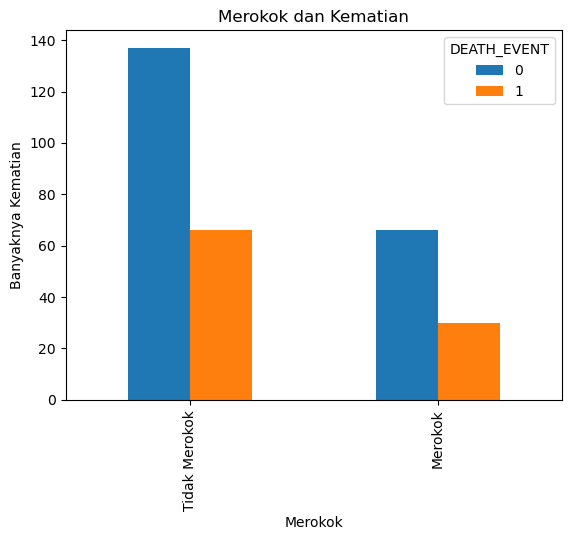

In [11]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind='bar')
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.title('Merokok dan Kematian')
plt.xticks(ticks=(0,1),labels=['Tidak Merokok','Merokok'])

Dari hasil visualisasi di atas diperoleh bahwa jumlah pasien merokok yang meninggal lebih sedikit dibandingkan pasien meninggal yang tidak merokok.

Dari atribut yang ada terdapat atribut Waktu, kita dapat mendrop atau menghilangkan atribut Waktu dikarenakan tidak relevan dengan variabel target. Waktu menunjukkan seberapa lama pasien dapat bertahan, sehingga atribut tersebut tidak cocok sebagai variabel independen, melainkan lebih cocok menjadi variabel target (untuk kasus yang lain).

In [12]:
df.drop(columns=['time'], inplace=True)

Mengecek kembali 5 baris teratas dataset yang telah dihilangkan atribut waktunya.

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


# Exploratory Data Analysis

Proses EDA  dilakukan dalam analisis data yang bertujuan untuk menggali pemahaman awal tentang data, mengidentifikasi pola, hubungan, anomali, dan tren dalam data sebelum melakukan analisis statistik yang lebih mendalam atau membangun model.

In [14]:
df_category=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
df_numeric=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

Melihat statistik descriptif pada data numerik:

In [15]:
num = df.drop(df_category, axis=1)
num.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Diperoleh bahwa:

1. Rata-rata pasien berusia 60 tahun
2. Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 581,83
3. Fraksi ejeksi maksimal yang ada pada pasien yaitu 80 dan Minimum 14
4. Kreatinin serum minimal yang ada pada pasien yaitu 0.5
5. Sodium serum rata-rata pada pasien yaitu 136.62

Melihat statistik descriptif pada data kategorik

In [16]:
cat = df.drop(df_numeric, axis=1).astype('category')
cat.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


Dari hasil statistik deskriptif di atas diperoleh:

1. Pasien yang tidak mengidap anemia yaitu 170 pasien
2. Pasien yang tidak mengidap diabetes yaitu 174 pasien
3. Pasien dengan tidak mengidap tekanan darah tinggi yaitu 194 pasien
4. Pasien yang tidak merokok yakni 203 pasien
5. Pasien yang tidak meninggal berjumlah 203 orang

Melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

In [17]:
df_mean = df[['age','DEATH_EVENT']].groupby('DEATH_EVENT').mean().sort_values(by='age', ascending=True)
df_mean

,age
DEATH_EVENT,
0,58.761906
1,65.215281


Dari hasil grouping di atas didapatkan bahwa pasien yang meninggal memiliki usia dengan rata-rata 65 tahun.

Melakukan crosstab pada atribut smoking(perokok) dan death event(kematian) dalam rangka untuk melihat proporsi dari dataset.

In [18]:
pd.crosstab(df.smoking, df.DEATH_EVENT)

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


Dari hasil crosstab di atas diperoleh bahwa banyaknya kasus kematian pasien yang merokok yakni sebanyak 30 pasien, sedangkan banyaknya pasien yang merokok dapat bertahan dan pasien yang tidak merokok namun meninggal memiliki jumlah angka yang sama yaitu 66 pasien. Untuk pasien yang tidak merokok dan tidak meninggal memiliki jumlah yang paling besar yaitu 137 pasien.

### Visualisasi Boxplot

Melakukan pengecekkan outliers dan memvisualisasikannya menggunakan box plot

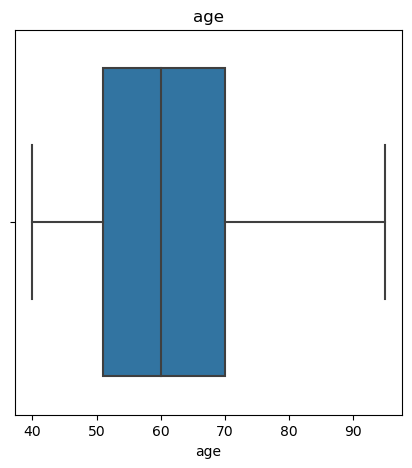

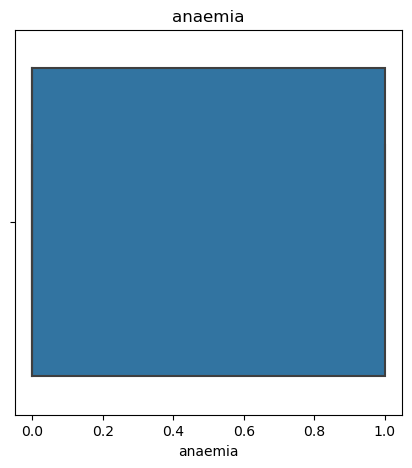

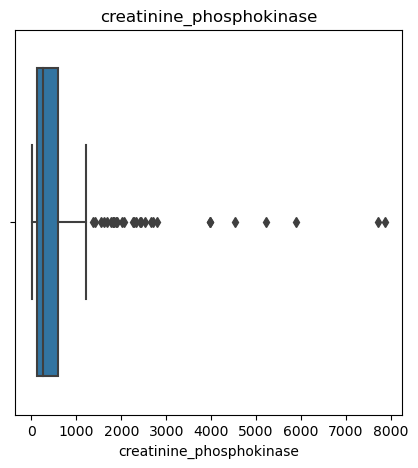

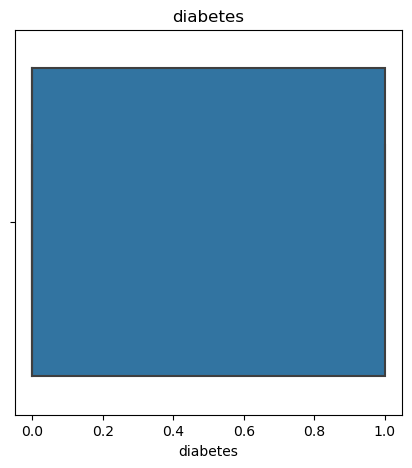

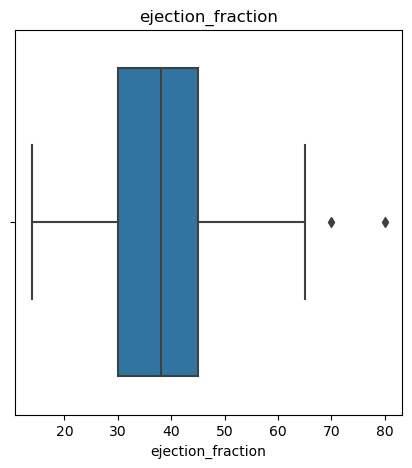

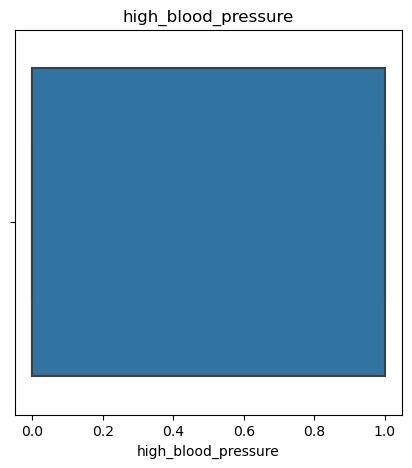

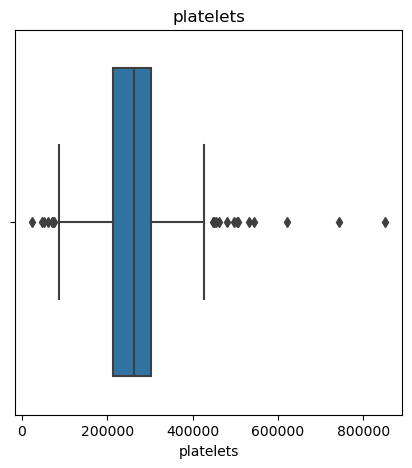

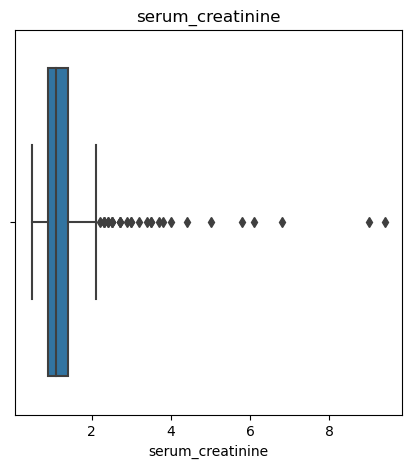

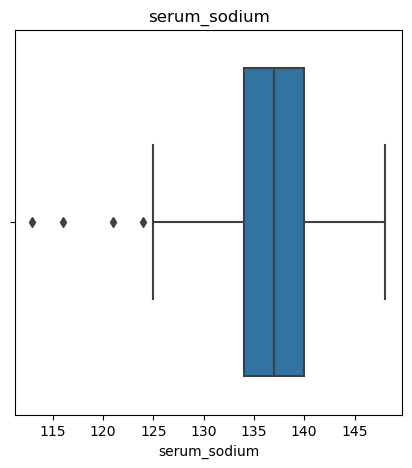

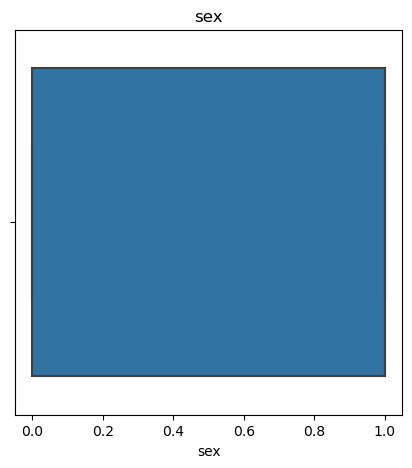

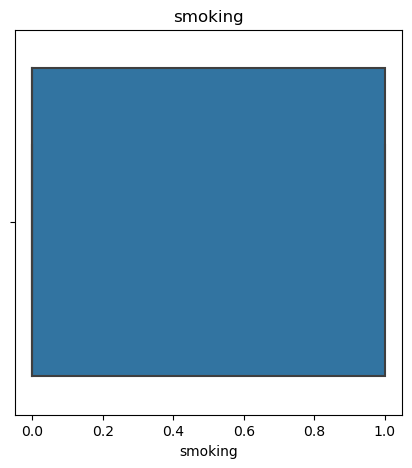

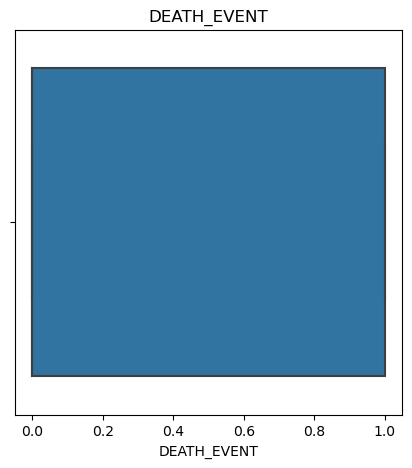

In [19]:
for feature in df:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[feature], orient="h") 
    plt.title(feature)

plt.show()

Dari hasil visualisasi di atas didapatkan bahwa masih terdapat atribut dengan nilai outlier yang banyak.

### Visualisasi Histogram

Melakukan visualisasi secara histogram untuk distribusi frekuensi dari Death Event (Kematian)

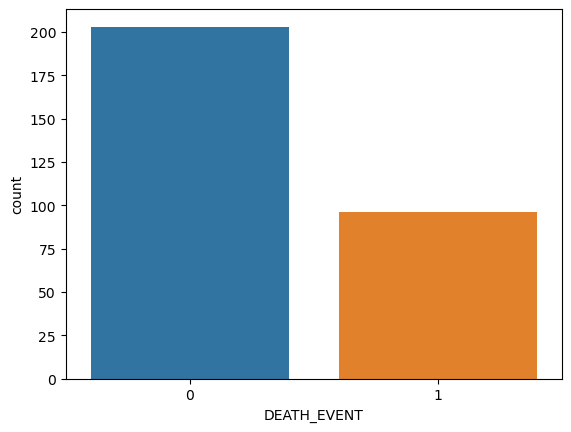

In [20]:
sns.countplot(x="DEATH_EVENT", data=df)
plt.show()

Dari visualisasi diatas didapatkan bahwa proporsi data antara pasien yang meninggal lebih sedikit dibandingkan pasien yang tidak meninggal.

### Correlation Matrix 

Membuat Correlation Matrix untuk mengukur sejauh mana dua variabel berkorelasi atau berhubungan satu sama lain.

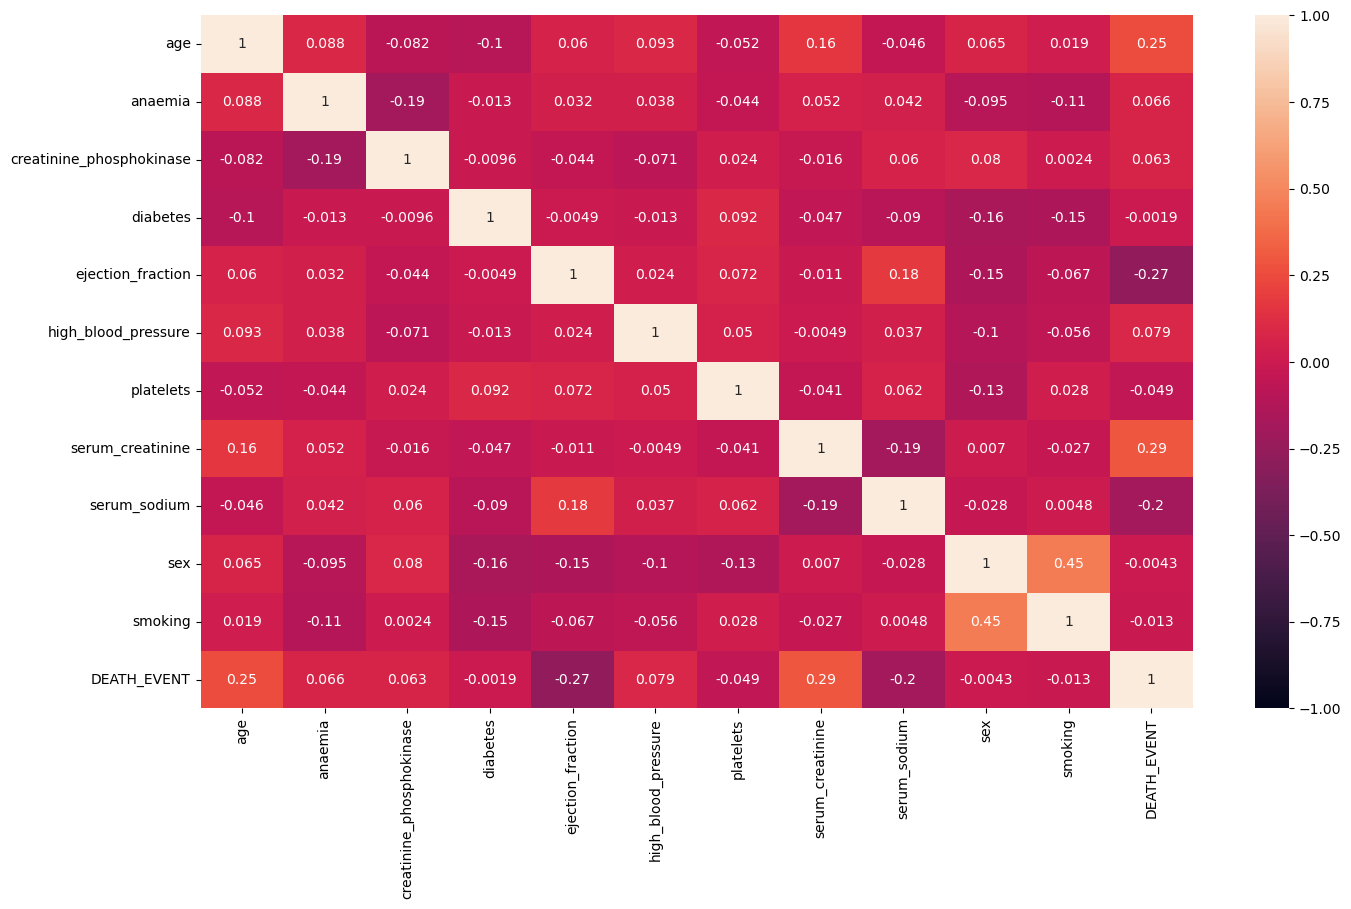

In [21]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [22]:
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

Dari hasil correlation matrix di atas didapatkan:
1. Atribut yang dipilih sebagai faktor penyebab kematian yaitu atribut yang mendekati nilai 1 (dan bernilai positif) yaitu serum creatinine, age, high blood pressure, dan anemia.
2. Atribut ejection fraction dan serum sodium memiliki korelasi negatif dengan Death Event/Kematian

# Data Preprocessing

Data preprocessing merupakan proses mempersiapkan data mentah menjadi bentuk yang sesuai untuk analisis atau pemodelan. 

Melakukan inisiasi variabel X dan Y

In [23]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(299, 11)
(299,)


### Feature Selection

Untuk meningkatkan kinerja model machine learning, mengurangi overfitting, menghemat waktu komputasi, dan meningkatkan pemahaman tentang data.

In [24]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

Diperoleh hasil dengan 10 feature/atribut yang paling berpengaruh dalam model

In [25]:
et.feature_importances_

array([0.13785492, 0.03165246, 0.10790414, 0.04433236, 0.16930291,
       0.03310683, 0.10813237, 0.17274457, 0.1202464 , 0.03605714,
       0.03866589])

Melakukan feature selection menggunakan library F regression dengan k=10

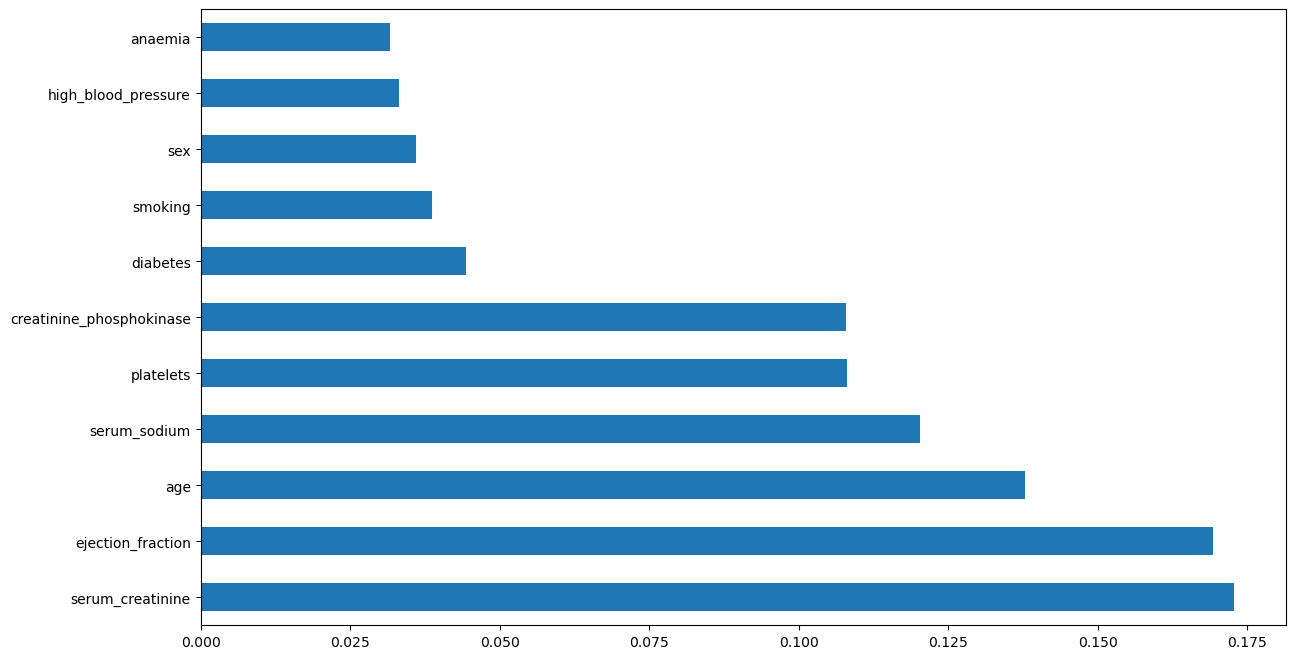

In [26]:
plt.figure(figsize=(14,8))
feat_importances=pd.Series(et.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 4 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan yaitu: - Ejection Fraction, Serum Creatinine, Age, dan Serum Sodium

In [27]:
X_fit = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]

Menampilkan 5 baris teratas dari dataset X_fit

In [28]:
X_fit.head()

,age,ejection_fraction,serum_creatinine,serum_sodium
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116


Menampilkan informasi singkat dari dataset X_fit

In [29]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   ejection_fraction  299 non-null    int64  
 2   serum_creatinine   299 non-null    float64
 3   serum_sodium       299 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


Melihat dimensi ukuran dari dataset X_fit:

In [30]:
X_fit.shape

(299, 4)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.30, random_state=325)

# Model Defining

Metode pengujian pada training ini menggunakan metode random forest classifier, extra tree classifier, dan gradien boosting classifier. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kategorik, sehingga metode tersebut cocok digunakan.

Model pertama yang digunakan yaitu model Random Forest Classifier dengan n estimator 10, max depth 70, min samples split 5.

In [32]:
clf1 = RandomForestClassifier(n_estimators=10, max_depth=70,min_samples_split=5, random_state=0)

Model kedua yaitu model Extra Tree Classifier dengan n estimator 10, max depth 5, min samples split 3

In [33]:
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=3, random_state=1)

Model ketiga yaitu model Gradient Boosting Classifier dengan n estimator 100, learning rate 0.1, max depth 1

In [34]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=1, random_state=3)

# Model Training

Model Training dilakukan untuk membuat model yang dapat memahami pola dalam data dan menghasilkan hasil yang baik saat diterapkan pada data yang tidak pernah dilihat sebelumnya. 

In [35]:
model1 = clf1.fit(X_train, y_train)

In [36]:
model2 = clf2.fit(X_train, y_train)

In [37]:
model3 = clf3.fit(X_train, y_train)

# Model Evaluation

Model Evaluation dilakukan untuk memahami sejauh mana model dapat memprediksi atau mengklasifikasikan data dengan benar, sekaligus mengidentifikasi kelemahan model yang perlu diperbaiki atau dioptimalkan

### Random Forest Classifier

In [38]:
y_pred1 = clf1.predict(X_test)
print("Test score:", clf1.score(X_test, y_test))
print("Train score:", clf1.score(X_train, y_train))

Test score: 0.7111111111111111
Train score: 0.9665071770334929


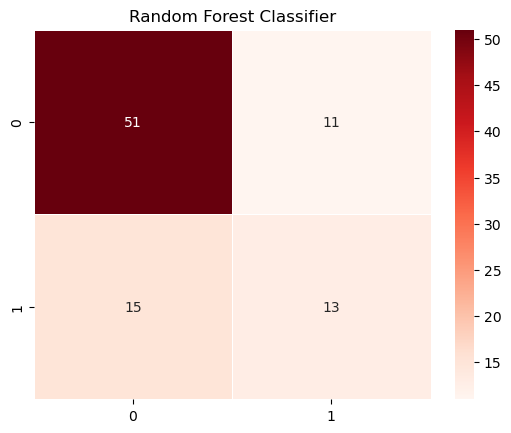

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        62
           1       0.54      0.46      0.50        28

    accuracy                           0.71        90
   macro avg       0.66      0.64      0.65        90
weighted avg       0.70      0.71      0.70        90

Hasil Evaluasi Model Random Forest Classifier
Akurasi : 0.7111111111111111
Presisi : 0.5416666666666666
Recall : 0.4642857142857143
F1 Score : 0.5


In [39]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.title('Random Forest Classifier')
plt.show()
print(classification_report(y_test, y_pred1))
print('Hasil Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred1))
print('Presisi :', precision_score(y_test,y_pred1))
print('Recall :', recall_score(y_test,y_pred1))
print('F1 Score :', f1_score(y_test,y_pred1))

### Extra Tree Classifier

In [40]:
y_pred2 = clf2.predict(X_test)
print("Test score:", clf2.score(X_test, y_test))
print("Train score:", clf2.score(X_train, y_train))

Test score: 0.6666666666666666
Train score: 0.8421052631578947


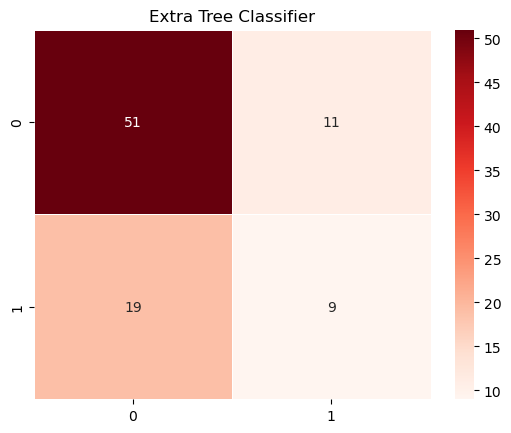

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        62
           1       0.45      0.32      0.38        28

    accuracy                           0.67        90
   macro avg       0.59      0.57      0.57        90
weighted avg       0.64      0.67      0.65        90

Hasil Evaluasi Model Extra Tree Classifier
Akurasi : 0.6666666666666666
Presisi : 0.45
Recall : 0.32142857142857145
F1 Score : 0.375


In [41]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.title('Extra Tree Classifier')
plt.show()
print(classification_report(y_test, y_pred2))
print('Hasil Evaluasi Model Extra Tree Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred2))
print('Presisi :', precision_score(y_test,y_pred2))
print('Recall :', recall_score(y_test,y_pred2))
print('F1 Score :', f1_score(y_test,y_pred2))

### Gradient Boosting Classifier

In [42]:
y_pred3 = clf3.predict(X_test)
print("Test score:", clf3.score(X_test, y_test))
print("Train score:", clf3.score(X_train, y_train))

Test score: 0.7111111111111111
Train score: 0.8277511961722488


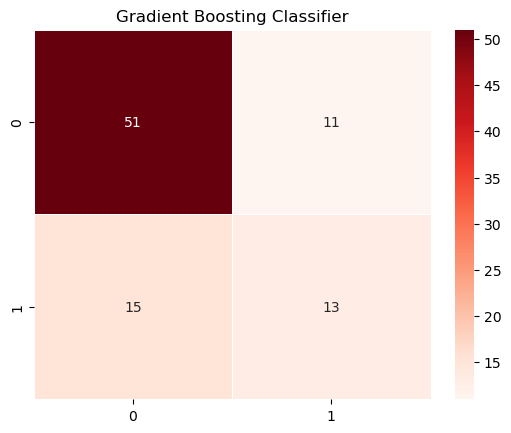

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        62
           1       0.55      0.39      0.46        28

    accuracy                           0.71        90
   macro avg       0.65      0.62      0.63        90
weighted avg       0.69      0.71      0.70        90

Hasil Evaluasi Model Gradient Boosting Classifier
Akurasi : 0.7111111111111111
Presisi : 0.55
Recall : 0.39285714285714285
F1 Score : 0.45833333333333337


In [43]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.title('Gradient Boosting Classifier')
plt.show()
print(classification_report(y_test, y_pred3))
print('Hasil Evaluasi Model Gradient Boosting Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred3))
print('Presisi :', precision_score(y_test,y_pred3))
print('Recall :', recall_score(y_test,y_pred3))
print('F1 Score :', f1_score(y_test,y_pred3))

Dari ketiga model yang digunakan didapatkan bahwa model ketiga (Gradient Boosting Classifier) dan model pertama (Random Forest Classifier) memiliki hasil yang lebih akurat dibandingkan model kedua (Extra Tree Classifier)

# Model Inference

Model Inference dilakukan untuk mengaplikasikan model yang telah ada ke situasi dunia nyata untuk memperoleh wawasan, membuat keputusan, atau memprediksi hasil. Dari hasil Model Evaluation, digunakan Random Forest Classifier untuk melakukan Model Inference

In [44]:
X_new = {'age':[50,60,70], 'ejection_fraction':[20,30,45], 'serum_creatinine':[1.5,4,3], 'serum_sodium':[120,130,140]}
X_new = pd.DataFrame(X_new)

Melakukan uji coba dengan 3 inputan berbeda:
1. Input pertama:
- Age: 50
- Ejection Fraction: 20
- Serum Creatinine: 1.5
- Serum Sodium: 120
2. Input Kedua:
- Age: 60
- Ejection Fraction: 30
- Serum Creatinine: 4
- Serum Sodium: 130
3. Input Ketiga:
- Age: 70
- Ejection Fraction: 45
- Serum Creatinine: 3
- Serum Sodium: 140

In [45]:
y_pred_new = clf1.predict(X_new)
print('Prediksi Pasien yaitu: ')
print(y_pred_new)

Prediksi Pasien yaitu: 
[1 1 0]


Hasil dari prediksi pasien pertama dan kedua menunjukkan hasil 1 yaitu Meninggal, sedangkan pasien ketiga tidak meninggal.

# Conclusion

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

- Dari 12 fitur, terdapat 4 fitur yang berpengaruh terhadap kematian dari pasien gagal jantung: Age(usia), Ejection Fraction, Serum Creatinine, Serum Sodium
- Dilakukan 3 model uji coba: 1. Random Forest Classifier, 2. Extra Tree Classifier, 3. Gradient Boosting Classifier
- Dari 3 model yang dilakukan uji coba, Gradient Boosting Classifier dan Random Forest Claaifier memiliki hasil yang lebih akurat dibandingkan model Extra Tree Classifier dengan hasil akurasi yang sama yaitu 0.711 atau 71%

In [46]:
pickle.dump(clf1, open('rfc.pkl', "wb"))